# Data Preprocessing

### Imports

In [1]:
import pandas as pd

from preprocessing import preprocessing

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib

import re

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### Define functions

In [15]:
def select_on_tweet_length(post, max_len):
    '''Check if the length of a post is smaller or equal to the max length.'''
    if len(post.split()) <= max_len:
        return True
    else: return False

In [20]:
def count_posts(reg_expression, post):
    '''Count the occurences of different regex in the posts.
    Used for some general statistics'''
    post_list = re.findall(reg_expression, post)
    return len(post_list)

In [2]:
def replace_words_by_ids(post, max_len, word_indices):
    '''Replace all tokens with an ID number'''
    ided_post = []
    for word in post.split():
        ided_post.append(word_indices[word])
    while len(ided_post) < max_len:
        ided_post.append(word_indices[' '])
    ided_post = ' '.join((str(v) for v in ided_post))
    return ided_post

### Import data

In [2]:
data = pd.read_csv('../data/complete_scraped_data.csv')

### General preprocessing

In [3]:
data['clean_post'] = data['post'].apply(lambda x: preprocessing(x))

In [4]:
data.head()

,datetime,tweet_id,post,user,set,clean_post
0,2021-05-31 13:02:37+00:00,1399350603969613833,Wat een gezeik; tot eind september mondkapjes....,Persoon2795,covid,Wat een gezeik ; tot eind september mondkapjes...
1,2021-05-31 10:21:26+00:00,1399310042717958149,Waarom zijn mensen bang voor vaccinatie? Het n...,Persoon19344,covid,Waarom zijn mensen bang voor vaccinatie ? Het ...
2,2021-05-30 20:08:25+00:00,1399095371398324226,Ik krijg buikpijn van de steeds terugkerende v...,Persoon14610,covid,Ik krijg buikpijn van de steeds terugkerende v...
3,2021-05-30 17:05:06+00:00,1399049239607578625,Je zou maar #AstraZeneca hebben laten prikken....,Persoon1779,covid,Je zou maar # AstraZeneca hebben laten prikken...
4,2021-05-30 17:03:17+00:00,1399048780729622528,#samenleving #ikdoenietmeermee #nederlands Hal...,Persoon1410,covid,Hallo allemaal . Dit is mijn gedicht over same...


*Remove posts that have fewer than 2 tokens after preprocessing*

In [5]:
print(len(data))
data = data[data['clean_post'].notnull()]
len(data)

82349


82261

*Remove duplicate clean posts*

In [6]:
print(len(data))
data = data.drop_duplicates(subset='clean_post', keep="first").reset_index(drop=True)
print(len(data))

82261
78912


In [7]:
data.head()

,datetime,tweet_id,post,user,set,clean_post
0,2021-05-31 13:02:37+00:00,1399350603969613833,Wat een gezeik; tot eind september mondkapjes....,Persoon2795,covid,Wat een gezeik ; tot eind september mondkapjes...
1,2021-05-31 10:21:26+00:00,1399310042717958149,Waarom zijn mensen bang voor vaccinatie? Het n...,Persoon19344,covid,Waarom zijn mensen bang voor vaccinatie ? Het ...
2,2021-05-30 20:08:25+00:00,1399095371398324226,Ik krijg buikpijn van de steeds terugkerende v...,Persoon14610,covid,Ik krijg buikpijn van de steeds terugkerende v...
3,2021-05-30 17:05:06+00:00,1399049239607578625,Je zou maar #AstraZeneca hebben laten prikken....,Persoon1779,covid,Je zou maar # AstraZeneca hebben laten prikken...
4,2021-05-30 17:03:17+00:00,1399048780729622528,#samenleving #ikdoenietmeermee #nederlands Hal...,Persoon1410,covid,Hallo allemaal . Dit is mijn gedicht over same...


In [8]:
preprocessing_show = data.sample(n=3, random_state=111).reset_index(drop=True) 
for p in range(len(preprocessing_show)):
    print(preprocessing_show['post'][p], '\n', preprocessing_show['clean_post'][p], '\n\n')

@gebruiker7221 7.50 om 40 uur mee te mogen doen in de samenleving... koekoek gaat ie lekker? #hugodejonge #ikdoenietmeermee #hugodejongekanniks #hugodejongemoetopgeslotenworden 
 @ gebruiker7221 7 . 50 om 40 uur mee te mogen doen in de samenleving . . . koekoek gaat ie lekker ?  


De verhoren zijn weer gestart. Geen ja, geen nee, en geen Eh. 😎. #toeslagenaffaire 
 De verhoren zijn weer gestart . Geen ja , geen nee , en geen Eh . .  


Hoe eerder hoe beter, geen kans geven om notulen/ stukken "kwijt te raken" #toeslagenschandaal #toeslagenaffaire https://t.co/WAO6yReHlD 
 Hoe eerder hoe beter , geen kans geven om notulen / stukken " kwijt te raken " # toeslagenschandaal 




In [9]:
covid = data[data['set'] == 'covid'].reset_index(drop=True)
affair = data[data['set'] == 'affair'].reset_index(drop=True)

*Find cut-off for tweet length*

In [10]:
sequence_lenghts_covid = {}
for post in covid['clean_post']:
    if len(post.split()) not in sequence_lenghts_covid.keys():
        sequence_lenghts_covid[len(post.split())] = 1
    else:
        sequence_lenghts_covid[len(post.split())] = sequence_lenghts_covid[len(post.split())]+1
        
sequence_lenghts_affair = {}
for post in affair['clean_post']:
    if len(post.split()) not in sequence_lenghts_affair.keys():
        sequence_lenghts_affair[len(post.split())] = 1
    else:
        sequence_lenghts_affair[len(post.split())] = sequence_lenghts_affair[len(post.split())]+1

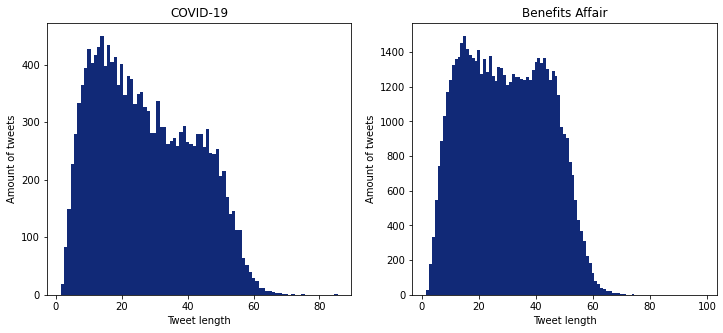

In [13]:
cmap = matplotlib.cm.get_cmap('gist_earth')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax[0].bar(sequence_lenghts_covid.keys(), sequence_lenghts_covid.values(), width=1.0, color=cmap(0.1))
ax[0].set_xlabel("Tweet length")
ax[0].set_ylabel("Amount of tweets")
ax[1].bar(sequence_lenghts_affair.keys(), sequence_lenghts_affair.values(), width=1.0, color=cmap(0.1))
ax[1].set_xlabel("Tweet length")
ax[1].set_ylabel("Amount of tweets")
ax[0].set_title('COVID-19')
ax[1].set_title('Benefits Affair')
plt.show()
fig.savefig('tweet_length_hists.png', bbox_inches="tight")


40 seems like a good length.

Keep only short tweets and generate new statistics.

In [16]:
covid['short'] = covid['clean_post'].apply(lambda x: select_on_tweet_length(x, 40))
affair['short'] = affair['clean_post'].apply(lambda x: select_on_tweet_length(x, 40))

In [17]:
short_covid = covid[covid['short'] == True]
short_affair = affair[affair['short'] == True]

In [18]:
len(short_covid), len(short_affair)

(12561, 45575)

In [19]:
short = pd.concat([short_covid, short_affair], axis=0).reset_index()
len(short)

58136

In [21]:
content_count = {
    'characters': short['clean_post'].apply(lambda x: len(x)), #Twitter does not always count characters in a straightforward way, so there can be values above 240
    'words' : short['clean_post'].apply(lambda x: len(x.split())),
    'mentions' : short['clean_post'].apply(lambda x: count_posts(r'@', x)),
    'hashtags' : short['clean_post'].apply(lambda x: count_posts(r'#', x)),
    'urls' : short['clean_post'].apply(lambda x: count_posts(r'http.?://[^\s]+[\s]?', x)),   
}

In [23]:
df = pd.concat([data, pd.DataFrame(content_count)], axis=1)

In [24]:
for key in content_count.keys():
    print()
    print('Descriptive statistics for {}'.format(key))
    print(df.groupby('set')[key].describe())


Descriptive statistics for characters
          count        mean        std  min   25%    50%    75%    max
set                                                                   
affair  41842.0  127.449262  58.373768  6.0  79.0  124.0  174.0  294.0
covid   16294.0  117.210568  56.197681  6.0  71.0  112.0  161.0  294.0

Descriptive statistics for words
          count       mean        std  min   25%   50%   75%   max
set                                                               
affair  41842.0  22.772573  10.106866  2.0  14.0  23.0  31.0  40.0
covid   16294.0  21.525776  10.163702  2.0  13.0  21.0  30.0  40.0

Descriptive statistics for mentions
          count      mean       std  min  25%  50%  75%  max
set                                                         
affair  41842.0  0.274867  0.596945  0.0  0.0  0.0  0.0  6.0
covid   16294.0  0.172333  0.461365  0.0  0.0  0.0  0.0  6.0

Descriptive statistics for hashtags
          count      mean       std  min  25%  50%  75%  

*check vocab sizes for data inspection*

In [31]:
covid_words = [word for post in short_covid['clean_post'] for word in post.split()]
affair_words = [word for post in short_affair['clean_post'] for word in post.split()]

In [32]:
vocab_covid = len(set(covid_words))
vocab_affair = len(set(affair_words))
vocab_covid, vocab_affair

(21874, 45404)

### Create datasets for Experiments

#### Experiment 1

*Remove unfrequent terms*

In [33]:
word_freq_covid = Counter(covid_words)

In [34]:
len(word_freq_covid)

21874

In [35]:
max(word_freq_covid.values())

17105

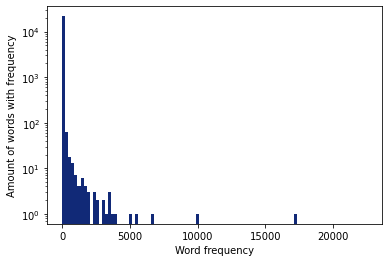

In [37]:
plt.hist(word_freq_covid.values(), bins=100, range=(0,22500), color=cmap(0.1), log=True)
plt.ylabel('Amount of words with frequency')
plt.xlabel('Word frequency')
plt.savefig('word_frequencies.png')

Multiple thresholds were tried.

In [69]:
unfrequent_covid = {key:value for (key, value) in word_freq_covid.items() if value < 3}
len(unfrequent_covid)

15747

Remove tweets with unfrequent terms.

In [70]:
covid_without_unfrequent_words = [post for post in short_covid['clean_post'] if len(set([word for word in post.split()]).intersection(set(unfrequent_covid.keys()))) == 0]

In [71]:
len(covid_without_unfrequent_words), len(covid), len(short_covid)

(4101, 16294, 12561)

In [77]:
gen_covid = pd.DataFrame(covid_without_unfrequent_words, columns=['text'])

In [78]:
gen_covid.head()

,text
0,Dit is de echte # viruswaarheid
1,ikdoenietmeermee is nr . 10 trending hashtag i...
2,Moet niet gekker worden # ikdoenietmeermee
3,niet # ikdoenietmeermee wanneer ik de kans kri...
4,Die is wel wijzer . Net als jij en ik # ikweiger


*Train-test split*

In [103]:
train, test = train_test_split(gen_covid, test_size=0.2, random_state=16)

In [104]:
len(train), len(test)

(3280, 821)

In [105]:
test, val = train_test_split(test, test_size=0.5, random_state=16)

In [106]:
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

In [107]:
len(train), len(test), len(val)

(3280, 410, 411)

In [132]:
covid_small_vocab = list(set([word for post in gen_covid['text'] for word in post.split()]))
train_vocab = list(set([word for post in train['text'] for word in post.split()]))
val_vocab = list(set([word for post in val['text'] for word in post.split()]))
test_vocab = list(set([word for post in test['text'] for word in post.split()]))

In [133]:
len(covid_small_vocab), len(train_vocab), len(test_vocab), len(val_vocab)

(4664, 4301, 1490, 1623)

*ID all tokens for ARAML*

In [111]:
covid_train_word_indices = {word:i for (i, word) in list(enumerate(train_vocab))}
covid_train_word_indices[' '] = int(len(train_vocab))

In [113]:
train['ids'] = list(map(lambda x: replace_words_by_ids(x, 40, covid_train_word_indices), train['text']))

In [1]:
# The ARAML ID-token list needs to contain an extra ID for an empty space used for padding
train_vocab.append(' ')

NameError: name 'train_vocab' is not defined

#### Experiment 2

In [26]:
short_covid_sample = short_covid.sample(1400, random_state=16) #rounded
short_affair_sample = short_affair.sample(45500, random_state=16) #rounded
initial_classifier_sample = shuffle(pd.concat([short_covid_sample, short_affair_sample], axis=0)).reset_index(drop=True)
print(len(initial_classifier_sample))
initial_classifier_sample.head()

46900


,datetime,tweet_id,post,user,set,clean_post,short
0,2021-02-22 10:32:38+00:00,1363798851124162563,ontzeg alle politici die voor de coronamaatreg...,Persoon18125,covid,ontzeg alle politici die voor de coronamaatreg...,True
1,2021-01-12 05:50:43+00:00,1348870001009299456,@gebruiker3481 is zo’n beetje toonbeeld van al...,Persoon15039,affair,@ gebruiker3481 is zon beetje toonbeeld van al...,True
2,2021-01-12 13:51:44+00:00,1348991052238249986,Waarom denk Wiebes dat bij uitstek de veroorza...,Persoon13264,affair,Waarom denk Wiebes dat bij uitstek de veroorza...,True
3,2021-01-15 18:19:37+00:00,1350145628903510017,Verdeeld = blij 🤷🏻‍♀️ #toeslagenaffaire https:...,Persoon5979,affair,Verdeeld = blij # toeslagenaffaire,True
4,2021-05-31 17:32:28+00:00,1399418515187245059,De ellende gaat door zo kan ik verder oplijste...,Persoon11950,affair,De ellende gaat door zo kan ik verder oplijste...,True


In [27]:
initial_classifier_sample = initial_classifier_sample.drop(['datetime', 'tweet_id', 'post', 'user', 'short'], axis=1)
initial_classifier_sample.head()

,set,clean_post
0,covid,ontzeg alle politici die voor de coronamaatreg...
1,affair,@ gebruiker3481 is zon beetje toonbeeld van al...
2,affair,Waarom denk Wiebes dat bij uitstek de veroorza...
3,affair,Verdeeld = blij # toeslagenaffaire
4,affair,De ellende gaat door zo kan ik verder oplijste...


### Save datafiles

*General*

In [25]:
short_covid.to_csv('../data/short_covid.csv', index=False)
short_affair.to_csv('../data/short_affair.csv', index=False)

*Experiment 1*

In [117]:
with open("../data/covid_gen_train_vocab.txt", "w") as outfile:
    outfile.write("\n".join(train_vocab))

In [118]:
with open("../data/covid_gen_train_ids.txt", "w") as outfile:
    outfile.write("\n".join(train['ids']))

In [119]:
with open("../data/covid_gen_train_text.txt", "w") as outfile:
    outfile.write("\n".join(train['text']))

In [120]:
with open("../data/covid_gen_val_text.txt", "w") as outfile:
    outfile.write("\n".join(val['text']))

In [121]:
with open("../data/covid_gen_test_text.txt", "w") as outfile:
    outfile.write("\n".join(test['text']))

*Experiment 2*

In [28]:
initial_classifier_sample.to_csv('../data/active_learning_data_to_test_imbalanced.csv', index=False)